# Compare intronic reads to transcriptome reads

## Purpose

In this script we are going to get the ratios of intronic reads to transcriptome reads for all the different experimental conditions to see which condition is ideal for getting the most intronic reads

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Set variable to find highly expressed genes or transcripts
feature="Gene"

In [3]:
# Set variable to remove non-coding genes
removeNC=True
removeNC_string=""
if removeNC:
    removeNC_string="Coding"
    geneNamesAndTranscriptIDs = pd.read_csv("../data/GeneNameTranscriptID_NCBI_RefSeq_hg38_FromGFFfile.tsv",header=None,sep="\t")
    noncodinggeneNames= list(geneNamesAndTranscriptIDs[geneNamesAndTranscriptIDs[0].str.contains("NR_")|geneNamesAndTranscriptIDs[0].str.contains("XR_")][1].values)
    noncodingtranscriptNames= list(geneNamesAndTranscriptIDs[geneNamesAndTranscriptIDs[0].str.contains("NR_")|geneNamesAndTranscriptIDs[0].str.contains("XR_")][0].values)
    noncodingFeatures = noncodinggeneNames+noncodingtranscriptNames

In [4]:
# Set variable to only look at features that have introns in them
featuresWithIntrons=True
featuresWithIntrons_string=""
if featuresWithIntrons:
    featuresWithIntrons_string="WithIntronicRegions"
    # Get the transcript and genes that have introns within them
    geneNamesAndTranscriptIDs_withIntrons = pd.read_csv("../data/GeneNameTranscriptID_NCBI_RefSeq_hg38_FromGFFfile_OnlyOnesWithIntrons.tsv",header=None,sep="\t")
    print geneNamesAndTranscriptIDs_withIntrons.shape
    print geneNamesAndTranscriptIDs_withIntrons.head()

(153118, 2)
              0               1
0       DDX11L1     NR_046018.2
1        WASH7P     NR_024540.1
2   MIR1302-2HG  XR_001737835.1
3       FAM138A     NR_026818.1
4  LOC100996442  XR_001737582.2


In [5]:
if feature=="Gene":
    fileToRead="quant.genes.sf"
else:
    fileToRead="quant.sf"

In [6]:
# Set variable to determine how many expressed features to look at
# If set to 0, then get all features
numFeatures=100

In [8]:
# Get highly expressed features from each file for the transcriptome data
top_features_Transcriptome = []
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    if "transcripts_quant_genenames" in filename and "transcripts_quant_genenames_" not in filename and (("DMS" in filename and "Mad-30mm-8hr-DMS" not in filename) or ("Mad-30mm-8hr-minus_S12" in filename)):
        print filename
        # Read the salmon output file
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        # If features with Introns flag is set, only get features that have introns in them
        if featuresWithIntrons:
            # Only features with introns
            data_to_read = data_to_read[(data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[0])|data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[1]))]
        # If removeNC flag is set, only get coding features
        if removeNC:
            data_to_read = data_to_read[~(data_to_read["Name"].str.contains("NR_")|data_to_read["Name"].str.contains("XR_")|data_to_read["Name"].isin(noncodingFeatures))]
        # Sort the data by TPM
        data_to_read_sorted = data_to_read.sort_values(by=["TPM"],ascending=False)
        # Grab the names of the first 100 features
        if numFeatures==0:
            top_features_Transcriptome.extend(list(data_to_read_sorted["Name"].values))
        else:
            top_features_Transcriptome.extend(list(data_to_read_sorted.iloc[range(numFeatures),0].values))

Mad-30mm-8hr-minus_S12_transcripts_quant_genenames
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames


In [9]:
# Get highly expressed features from each file for the genomic data
top_features_Intron = []
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    if "transcripts_quant_genenames_AgainstIntronicCoordinates" in filename and (("DMS" in filename and "Mad-30mm-8hr-DMS" not in filename) or ("Mad-30mm-8hr-minus_S12" in filename)):
        print filename
        # Read the salmon output file
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        # If features with Introns flag is set, only get features that have introns in them
        if featuresWithIntrons:
            # Only features with introns
            data_to_read = data_to_read[(data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[0])|data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[1]))]
        # If removeNC flag is set, only get coding features
        if removeNC:
            data_to_read = data_to_read[~(data_to_read["Name"].str.contains("NR_")|data_to_read["Name"].str.contains("XR_")|data_to_read["Name"].isin(noncodingFeatures))]
        # Sort the data by TPM
        data_to_read_sorted = data_to_read.sort_values(by=["TPM"],ascending=False)
        # Grab the names of the first 100 features
        if numFeatures==0:
            top_features_Intron.extend(list(data_to_read_sorted["Name"].values))
        else:
            top_features_Intron.extend(list(data_to_read_sorted.iloc[range(numFeatures),0].values))

Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-30mm-8hr-minus_S12_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames_AgainstIntronicCoordinates


In [10]:
# Combine the two feature files together to get a unique list
unique_top_features = list(set(top_features_Intron + top_features_Transcriptome))
print(len(unique_top_features))

325


In [11]:
# Create a data frame with unique top features as column
feature_readCounts_transcriptome = pd.DataFrame({"feature":sorted(unique_top_features)})
# For the unique features, get the TPM for each of them and store in a data frame
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts_transcriptome.columns.values)
    if "transcripts_quant_genenames" in filename and "transcripts_quant_genenames_" not in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        data_sortedBy_FeatureName = data_GetFeatures.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts_transcriptome = pd.concat([feature_readCounts_transcriptome,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts_transcriptome.columns = current_columns

Mad-30mm-8hr-minus_S12_transcripts_quant_genenames
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames
Mad-20mm-8hr-minus_S11_transcripts_quant_genenames
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames


In [12]:
feature_readCounts_transcriptome = feature_readCounts_transcriptome.iloc[:,range(1,feature_readCounts_transcriptome.shape[1])]
feature_readCounts_transcriptome.index = sorted(unique_top_features)
print feature_readCounts_transcriptome.shape
feature_readCounts_transcriptome.head()

(325, 12)


,Mad-30mm-8hr-minus_S12,Mad-20mm-8hr-DMS_S8,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-DMS_S9,Mad-20mm-8hr-minus_S11,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10,Mad-30mm-4hr-DMS_S3
AAMP,33.7771,21.5809,20.0211,29.4166,30.9019,29.6219,26.8571,22.4926,27.4822,25.1142,30.9052,29.6507
ABCF1,45.4690,33.1192,16.2673,38.4632,45.0659,17.6725,41.4350,29.1190,45.0398,36.1003,41.9545,27.9871
ABCF3,24.7176,15.0884,13.3468,17.7483,23.8716,13.9295,25.8807,34.2300,26.6266,30.1217,28.3053,10.6851
ACTB,1419.6600,1418.5400,1338.7600,1617.6700,2264.1900,1784.8500,1787.0600,1924.0700,2530.6400,2046.8900,1959.6400,1346.8100
ADAM8,33.2798,21.7150,14.5229,32.6577,45.8691,26.6551,38.2660,25.6273,47.3307,36.6526,33.7651,21.0349


In [13]:
# Create a data frame with unique top features as column
feature_readCounts_intron = pd.DataFrame({"feature":sorted(unique_top_features)})
# For the unique features, get the TPM for each of them and store in a data frame
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts_intron.columns.values)
    if "transcripts_quant_genenames_AgainstIntronicCoordinates" in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        data_sortedBy_FeatureName = data_GetFeatures.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts_intron = pd.concat([feature_readCounts_intron,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts_intron.columns = current_columns

Mad-20mm-8hr-minus_S11_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-30mm-8hr-minus_S12_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames_AgainstIntronicCoordinates
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames_AgainstIntronicCoordinates


In [14]:
feature_readCounts_intron = feature_readCounts_intron.iloc[:,range(1,feature_readCounts_intron.shape[1])]
feature_readCounts_intron.index = sorted(unique_top_features)
print feature_readCounts_intron.shape
feature_readCounts_intron.head()

(325, 12)


,Mad-20mm-8hr-minus_S11,Mad-30mm-4hr-DMS_S3,Mad-30mm-8hr-DMS_S9,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-minus_S12,Mad-10mm-8hr-DMS_S7,Mad-10mm-4hr-minus_S4,Mad-30mm-4hr-minus_S6,Mad-10mm-8hr-minus_S10,Mad-20mm-8hr-DMS_S8,Mad-20mm-4hr-minus_S5,Mad-20mm-4hr-DMS_S2
AAMP,251.226,191.358,184.854,617.076,339.455,422.937,403.263,283.974,185.802,363.671,143.983,369.062
ABCF1,624.582,1779.210,845.621,740.338,1823.200,563.260,882.221,756.372,1595.390,2044.850,1018.860,1859.230
ABCF3,262.861,627.415,424.985,240.182,733.349,299.334,222.540,470.004,968.748,974.844,463.567,917.332
ACTB,667.568,2079.460,2252.190,1235.270,2470.150,1215.610,728.460,1637.150,1107.660,1328.370,1919.150,2983.060
ADAM8,142.656,255.216,313.715,692.141,275.845,397.060,349.239,173.617,279.974,416.366,257.023,316.127


In [15]:
# Let's get ratios of feature counts for transcriptomic vs genomic
ratios_readCounts = feature_readCounts_intron/(feature_readCounts_transcriptome+1)
print ratios_readCounts.shape
ratios_readCounts.head()

(325, 12)


,Mad-10mm-4hr-DMS_S1,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-DMS_S7,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-DMS_S2,Mad-20mm-4hr-minus_S5,Mad-20mm-8hr-DMS_S8,Mad-20mm-8hr-minus_S11,Mad-30mm-4hr-DMS_S3,Mad-30mm-4hr-minus_S6,Mad-30mm-8hr-DMS_S9,Mad-30mm-8hr-minus_S12
AAMP,20.151460,15.442288,20.119642,5.823565,12.133572,5.055192,16.105248,10.693836,6.243185,8.901476,6.635795,9.760877
ABCF1,39.648574,23.779349,32.620039,37.141394,47.113007,22.129983,59.932531,20.737143,61.379372,16.419347,19.927442,39.234759
ABCF3,16.087746,7.150638,20.864165,33.057092,48.928810,16.779734,60.592974,7.461283,53.693593,18.897216,15.810042,28.515452
ACTB,0.691699,0.355712,0.907334,0.564948,1.842908,0.758066,0.935775,0.346776,1.542844,0.722743,1.259572,1.738734
ADAM8,25.027608,9.275296,25.578983,8.053306,9.392412,5.318007,18.330002,5.357509,11.582353,3.704296,7.989482,8.046867


In [16]:
# Get ratios for just DMS data
columns_DMS = [i for i in ratios_readCounts.columns.values if ("DMS" in i and "Mad-30mm-8hr-DMS" not in i) or ("Mad-30mm-8hr-minus_S12" in i)  ]
columns_DMS

['Mad-10mm-4hr-DMS_S1',
 'Mad-10mm-8hr-DMS_S7',
 'Mad-20mm-4hr-DMS_S2',
 'Mad-20mm-8hr-DMS_S8',
 'Mad-30mm-4hr-DMS_S3',
 'Mad-30mm-8hr-minus_S12']

In [17]:
ratios_readCounts_DMS = ratios_readCounts[columns_DMS]
ratios_readCounts_DMS.head()

,Mad-10mm-4hr-DMS_S1,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-20mm-8hr-DMS_S8,Mad-30mm-4hr-DMS_S3,Mad-30mm-8hr-minus_S12
AAMP,20.151460,20.119642,12.133572,16.105248,6.243185,9.760877
ABCF1,39.648574,32.620039,47.113007,59.932531,61.379372,39.234759
ABCF3,16.087746,20.864165,48.928810,60.592974,53.693593,28.515452
ACTB,0.691699,0.907334,1.842908,0.935775,1.542844,1.738734
ADAM8,25.027608,25.578983,9.392412,18.330002,11.582353,8.046867


In [18]:
# Lets the average for every time point and concentration
ratios_readCounts_DMS_avg = ratios_readCounts_DMS.apply(np.mean,axis=0)
ratios_readCounts_DMS_avg

Mad-10mm-4hr-DMS_S1       32.299790
Mad-10mm-8hr-DMS_S7       37.596212
Mad-20mm-4hr-DMS_S2       23.307706
Mad-20mm-8hr-DMS_S8       41.143298
Mad-30mm-4hr-DMS_S3       43.731618
Mad-30mm-8hr-minus_S12    30.348506
dtype: float64

(0, 17)

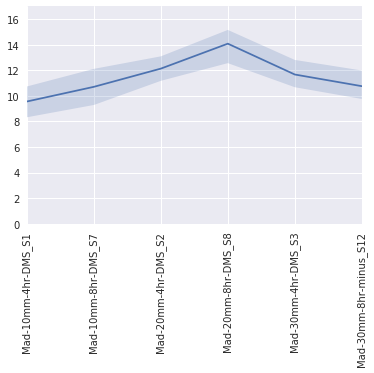

In [25]:
sns.set(font_scale=1)
ratios_readCounts_DMS_matrix = ratios_readCounts_DMS.values
ax = sns.tsplot(data=ratios_readCounts_DMS_matrix,estimator=np.median)
#ax.set(xticklabels=)
ax.set_xticklabels(labels=ratios_readCounts_DMS_avg.index.values,rotation=90)
plt.ylim(0, 17)

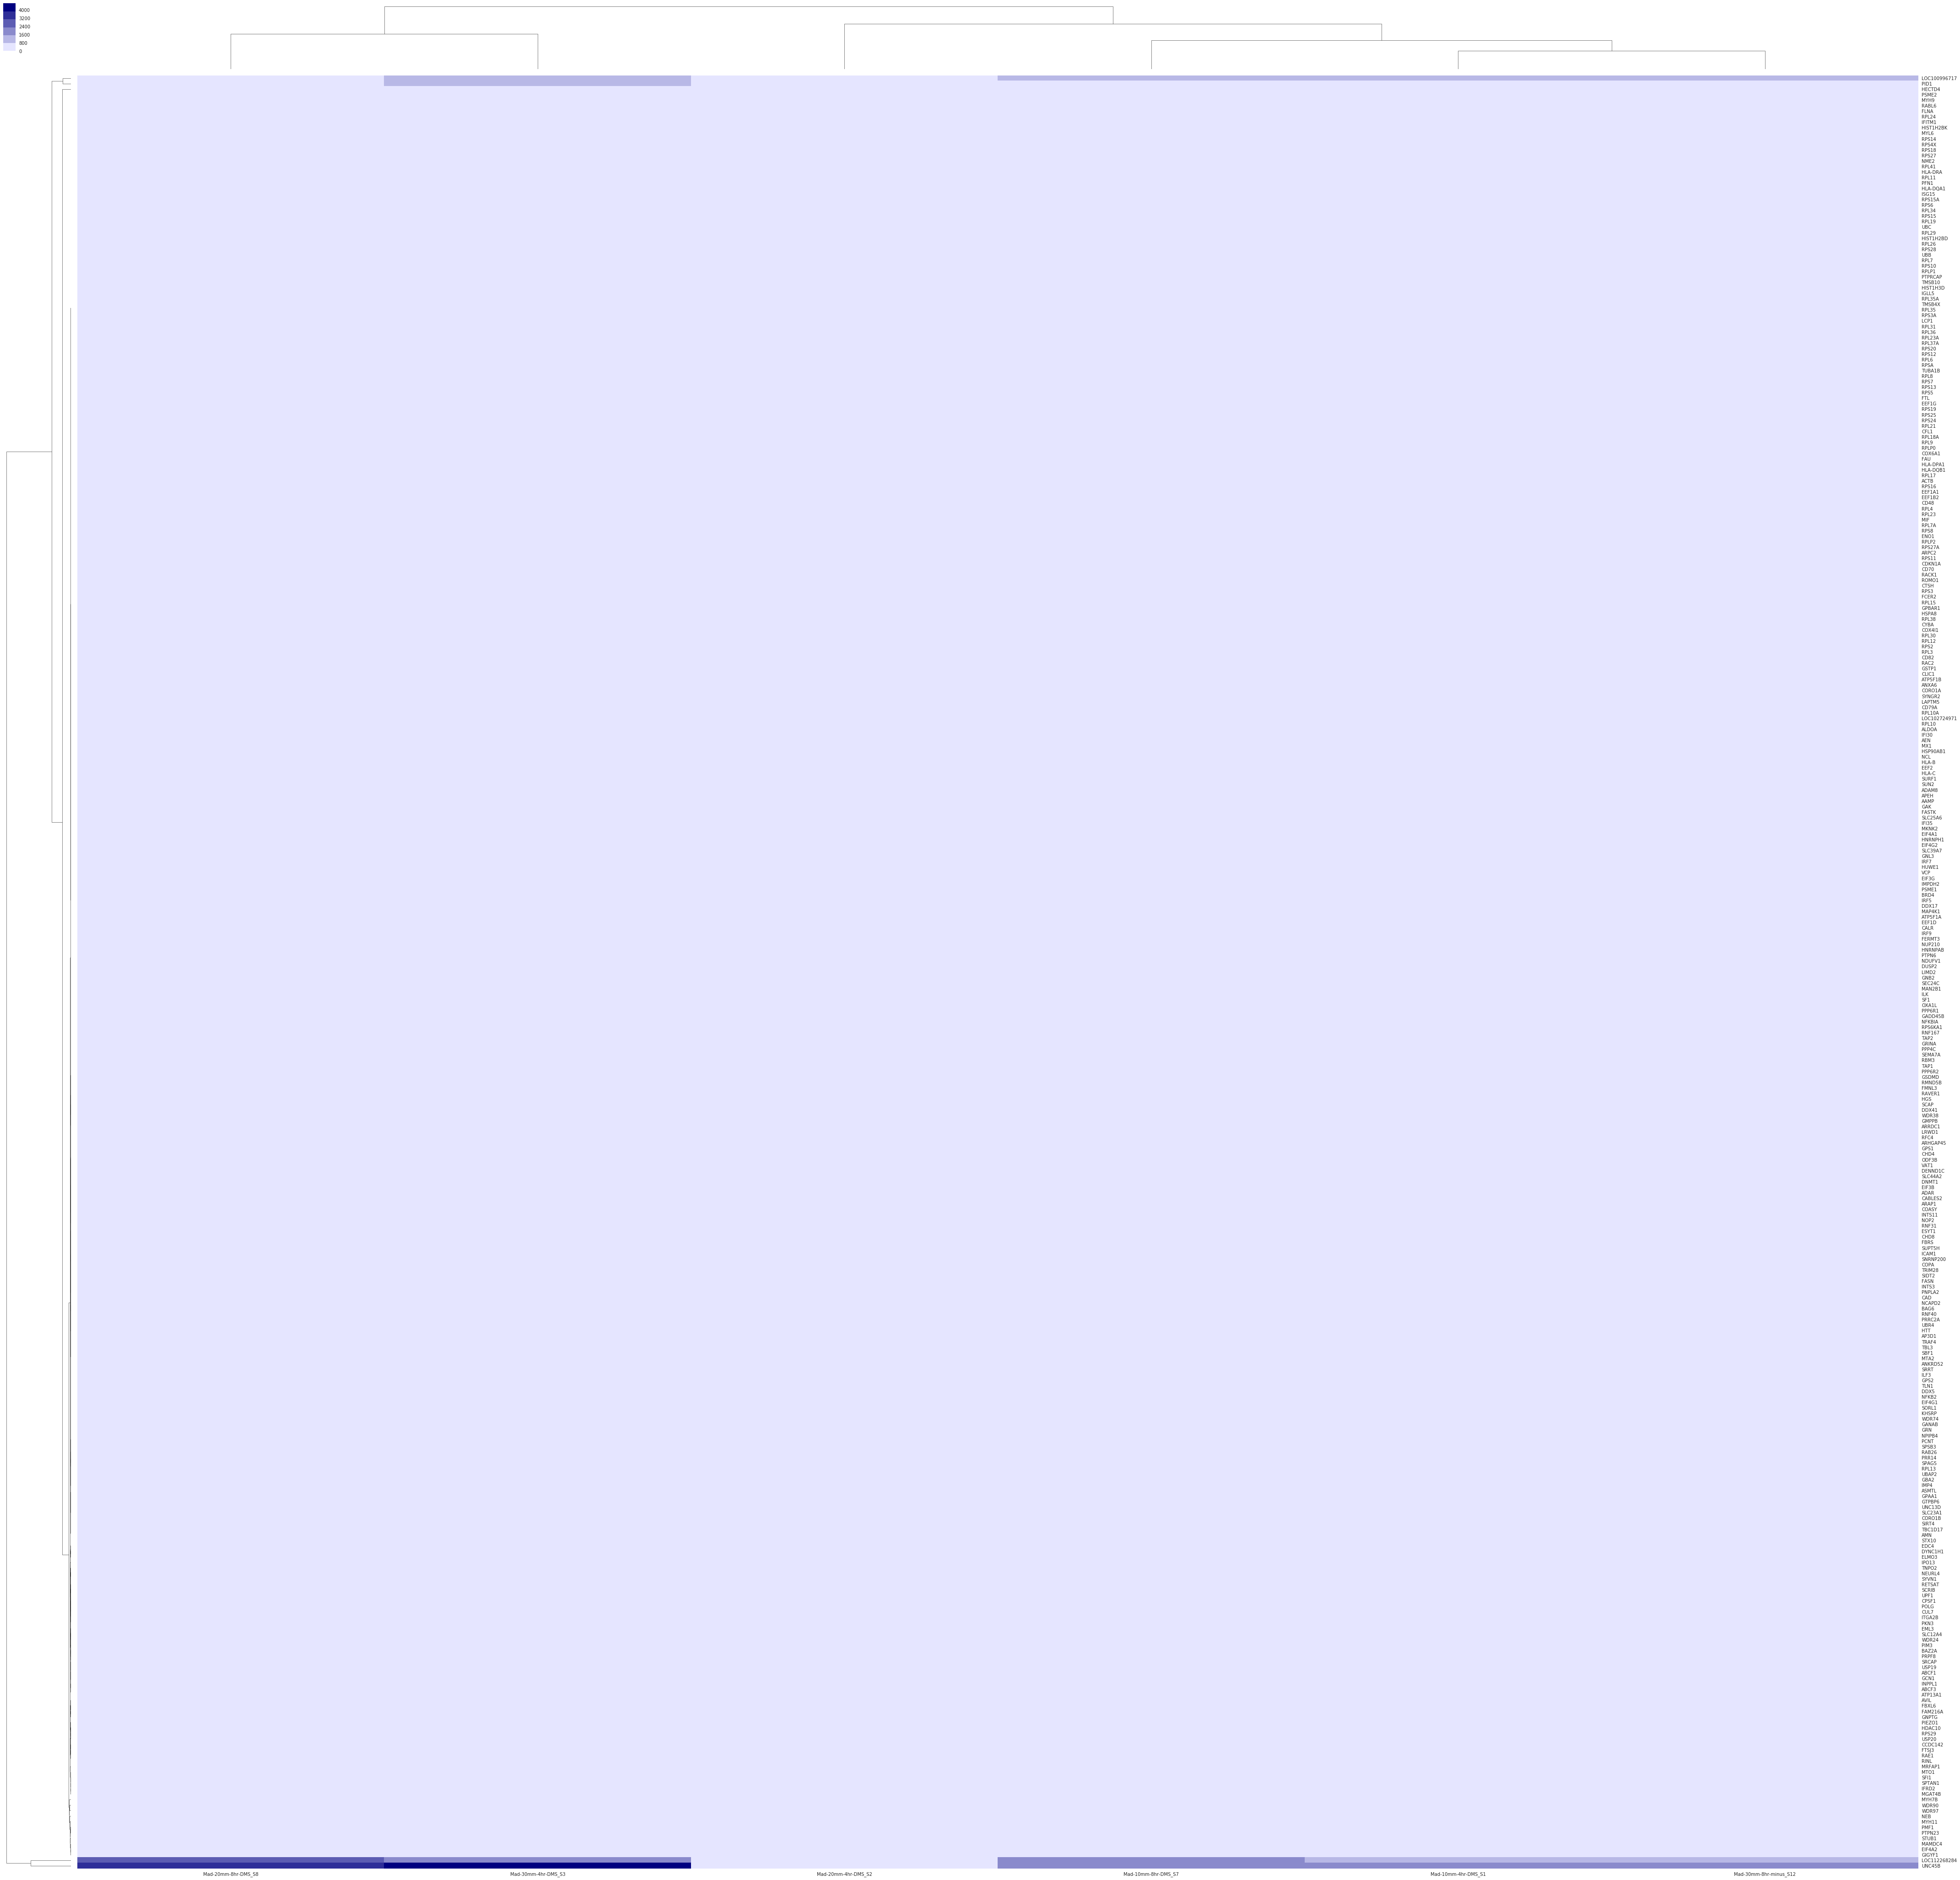

In [20]:
ax = sns.clustermap(ratios_readCounts_DMS,cmap=sns.light_palette("navy", reverse=False),annot=False, square=False, yticklabels=True, figsize=(75,75))
reordered_indices = ax.dendrogram_row.reordered_ind

In [21]:
labels_indices_org = ratios_readCounts_DMS.index.values
labels_indices_reordered = labels_indices_org[reordered_indices]
# Reorder the feature counts indices 
ratios_readCounts_DMS= ratios_readCounts_DMS.reindex(labels_indices_reordered)

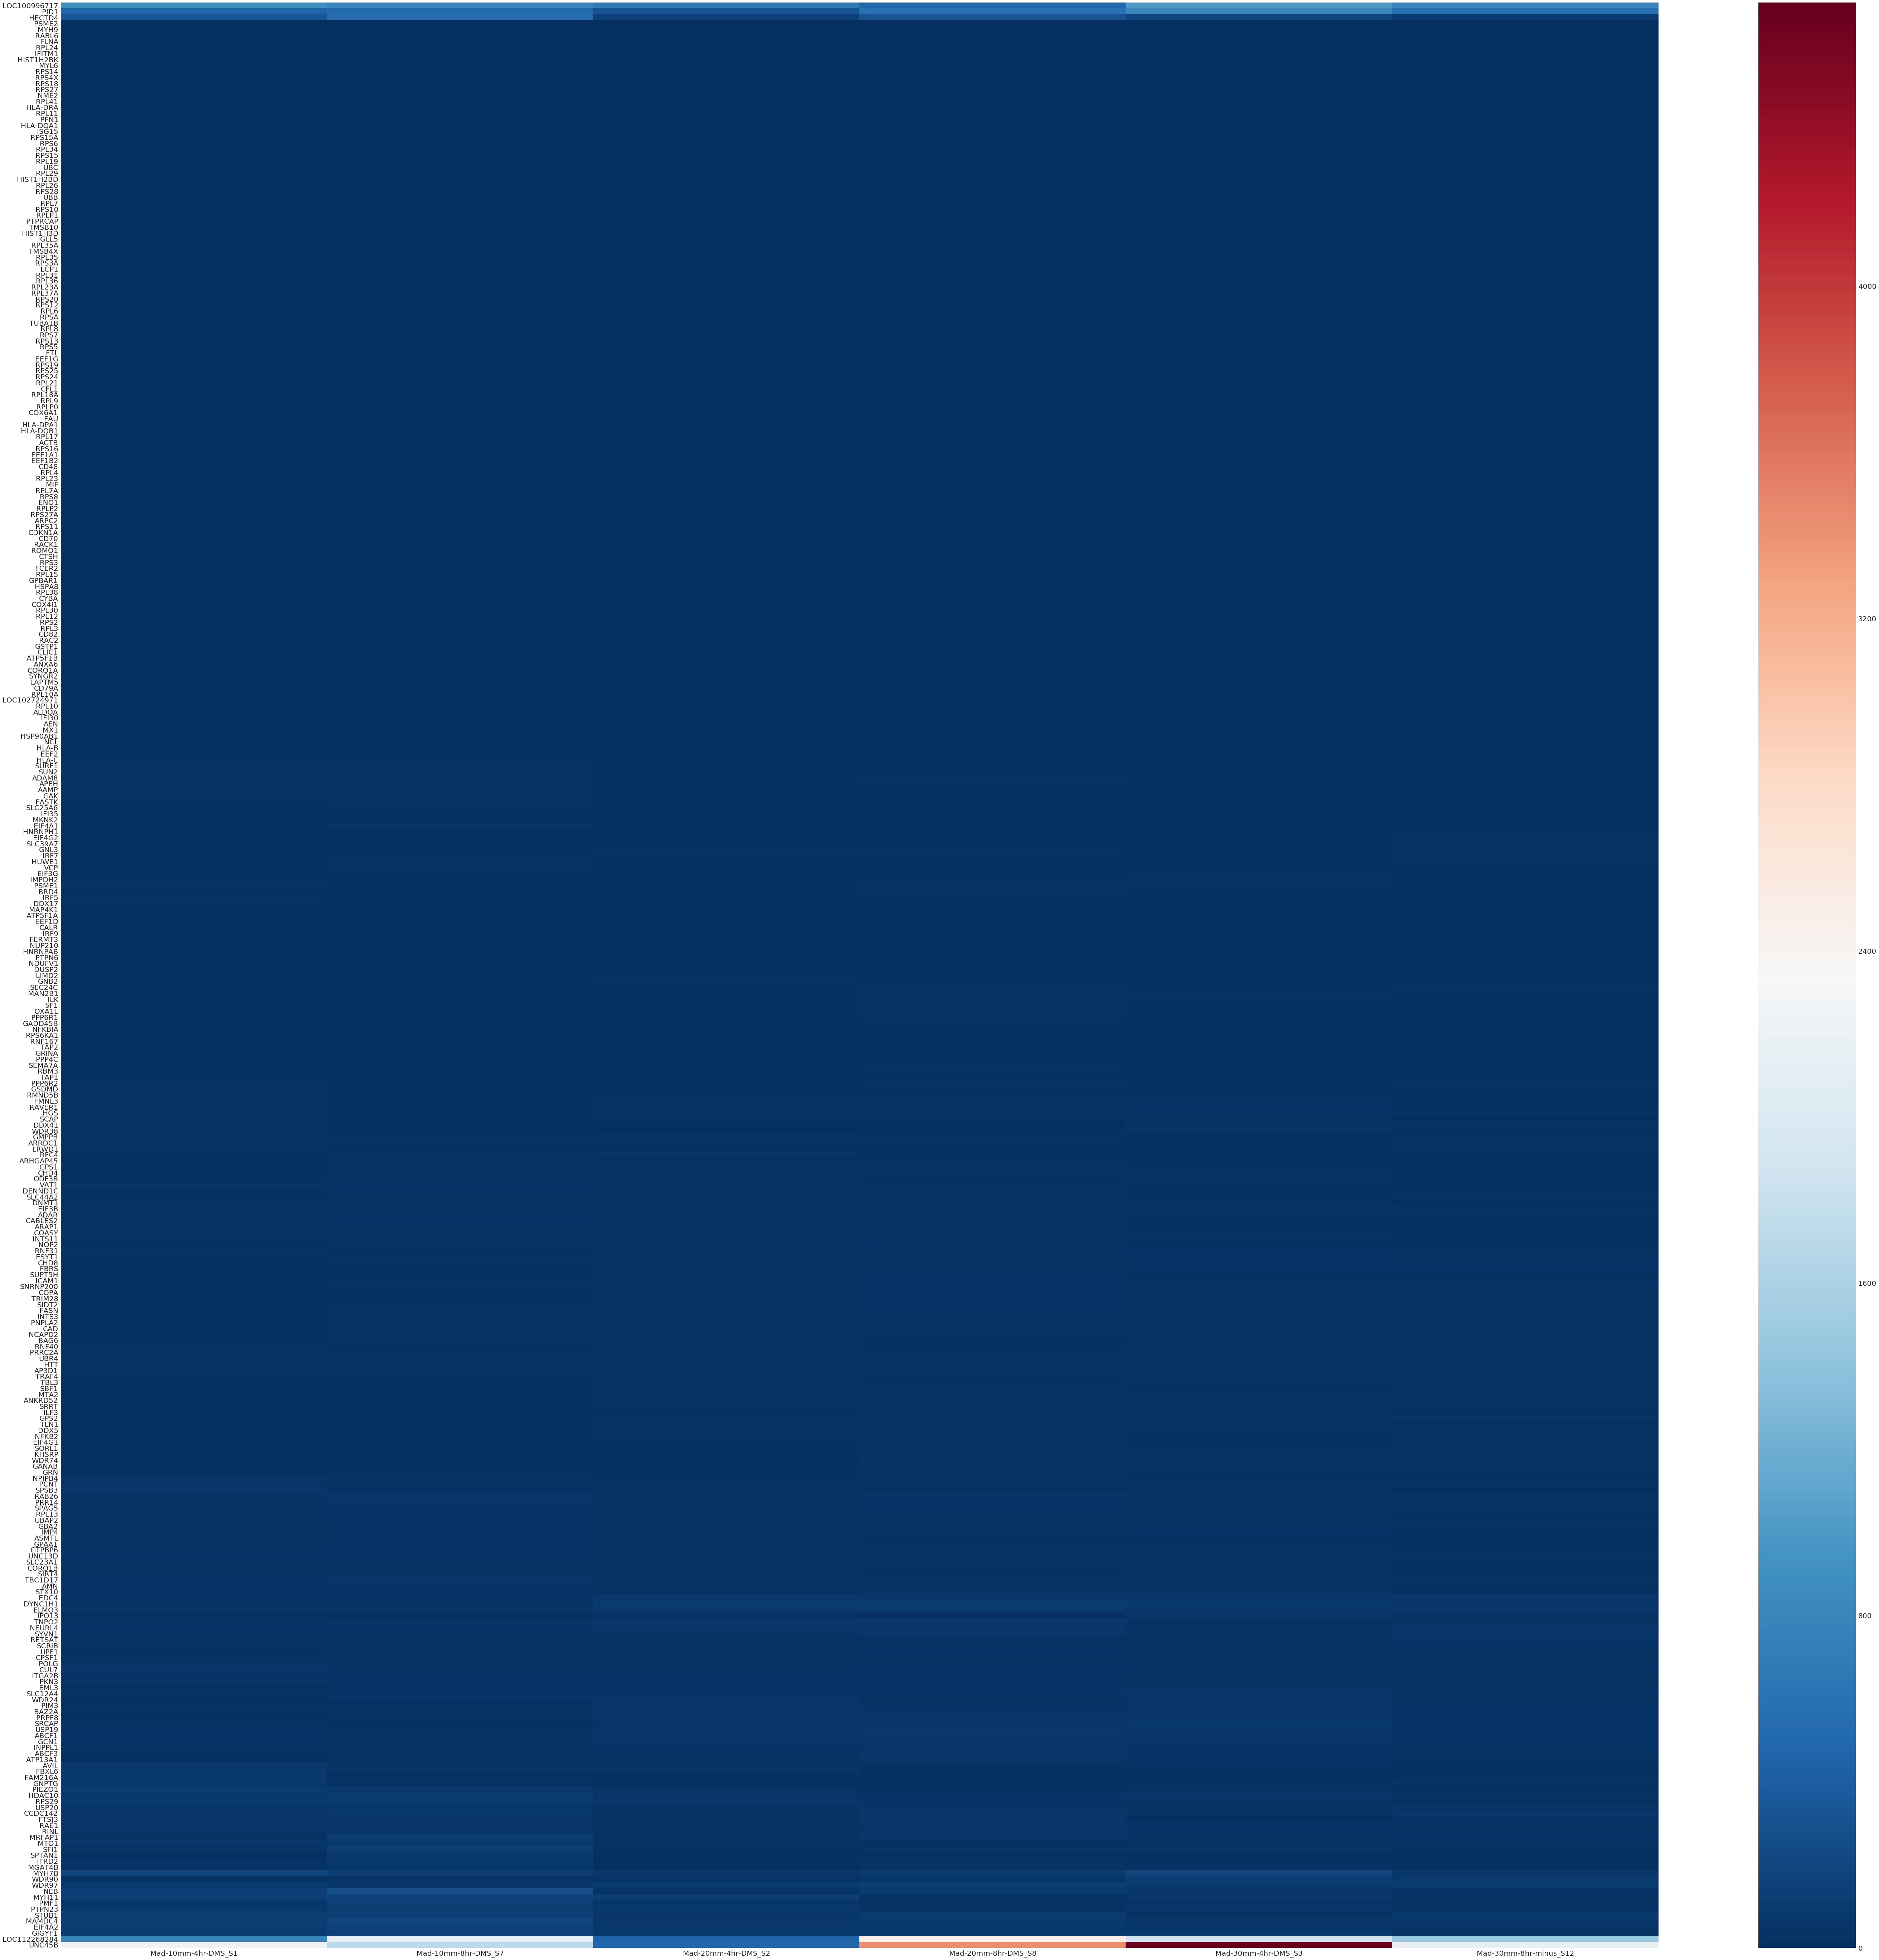

In [24]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(ratios_readCounts_DMS,cmap="RdBu_r",yticklabels=True, ax=ax)
#sns.heatmap(ratios_readCounts_DMS,cmap=sns.light_palette("navy", reverse=False),vmax=1,vmin=0,yticklabels=True, ax=ax)